## **In this project, I used the random forest algorithm to make a classifier to predict whether a person earns more than $50,000.**
Data from UCI’s Machine Learning Repository.
(https://archive.ics.uci.edu/ml/datasets/census%20income).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

**Data Exploration**

In [ ]:
income_data = pd.read_csv('income.csv')
income_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
income_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
income_data['sex_int'] = income_data['sex'].apply(lambda x:0 if x == 'Male' else 1)
labels = income_data[['income']]
data = income_data[["age", "capital.gain", "capital.loss", "hours.per.week", 'sex_int']]
data.head()

,age,capital.gain,capital.loss,hours.per.week,sex_int
0,90,0,4356,40,1
1,82,0,4356,18,1
2,66,0,4356,40,1
3,54,0,3900,40,1
4,41,0,3900,40,1


**Split training and testing data.**

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 42)

**Build a basic random forest model.**

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_data, train_labels)
Accuracy= rf.score(test_data, test_labels)
print(Accuracy)

0.8186703516044833


**Add New Variable.**

In [ ]:
income_data['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
income_data['country_int'] = income_data['native.country'].apply(lambda x:0 if x == 'United-States' else 1)
labels = income_data[['income']]
data = income_data[["age", "capital.gain", "capital.loss", "hours.per.week", 'sex_int', 'country_int']]

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 42)

**Set proper i for model accuracy.**

In [ ]:
accuracies = []
for i in range(1,51):
    rf = RandomForestClassifier(n_estimators = i, random_state = 42)
    rf.fit(train_data, train_labels)
    accuracies.append(rf.score(test_data, test_labels))

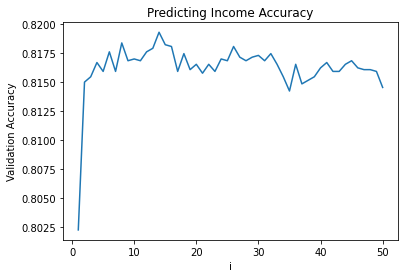

In [ ]:
i_list = [i for i in range(1, 51)]
plt.plot(i_list, accuracies)
plt.title("Predicting Income Accuracy")
plt.xlabel("i")
plt.ylabel("Validation Accuracy")
plt.show()

In [ ]:
final_table = pd.DataFrame(i_list, columns=["i_list"])
final_table = pd.concat([final_table, pd.DataFrame(accuracies, columns=["accuracies"])],axis=1)
final_table = final_table[final_table['accuracies'].isin([float(max(accuracies))])]
final_table

,i_list,accuracies
13,14,0.819285


In [106]:
print(rf.feature_importances_)

[0.31324635 0.2939634  0.11821487 0.19827714 0.06759187 0.00870637]


**The accuracy of the Predicting Income classification model is 0.819285 with n_estimators is 14.**